In [43]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [44]:
class Model(nn.Module):
    def __init__(self,in_features=4,h1=8,h2=8,out_features=3):
        super(Model,self).__init__()
        self.fc1=nn.Linear(in_features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,out_features)

    def forward(self,x):
        x=F.relu(self.fc1(x))
        x=F.relu(self.fc2(x))
        x=self.fc3(x)
        return x
        

In [45]:
torch.manual_seed(41)
model = Model()

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
df=pd.read_csv('iris.csv')

In [48]:
label_mapping = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}
df['variety'] = df['variety'].map(label_mapping)

In [49]:
X=df.drop('variety',axis=1)
y=df['variety']
X=X.values
y=y.values

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [52]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [53]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [55]:
epochs=200
losses = []
for i in range(epochs):
    y_pred=model.forward(X_train)
    loss = criterion(y_pred,y_train)
    losses.append(loss.detach().numpy())
    if i%10==0:
        print(f'Epoch: {i} and loss: {loss}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 and loss: 1.1318365335464478
Epoch: 10 and loss: 0.9658561944961548
Epoch: 20 and loss: 0.6789938807487488
Epoch: 30 and loss: 0.40048947930336
Epoch: 40 and loss: 0.22509503364562988
Epoch: 50 and loss: 0.12207334488630295
Epoch: 60 and loss: 0.07481689751148224
Epoch: 70 and loss: 0.054512787610292435
Epoch: 80 and loss: 0.044374898076057434
Epoch: 90 and loss: 0.03837943449616432
Epoch: 100 and loss: 0.03434774652123451
Epoch: 110 and loss: 0.03137679398059845
Epoch: 120 and loss: 0.029055016115307808
Epoch: 130 and loss: 0.027161752805113792
Epoch: 140 and loss: 0.025570685043931007
Epoch: 150 and loss: 0.024206873029470444
Epoch: 160 and loss: 0.023014331236481667
Epoch: 170 and loss: 0.021955009549856186
Epoch: 180 and loss: 0.021001268178224564
Epoch: 190 and loss: 0.020137611776590347


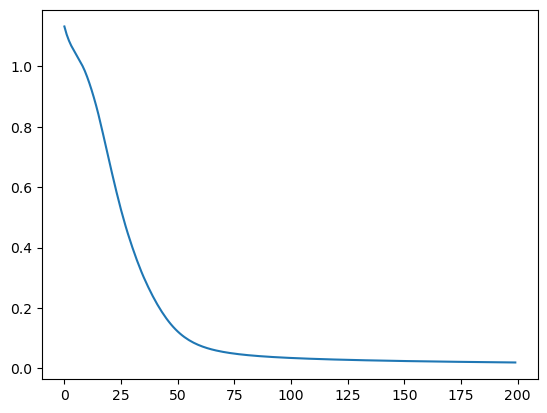

In [56]:
plt.plot(range(epochs),losses)
